In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FixedLocator
from wordcloud import WordCloud
from collections import Counter

In [87]:
data = pd.read_csv(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\data\netflix_data_with_links.csv")

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
 12  poster_url    7163 non-null   object
 13  movie_link    8807 non-null   object
dtypes: int64(1), object(13)
memory usage: 963.4+ KB


In [45]:
print(data.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
poster_url      1644
movie_link         0
dtype: int64


In [46]:
# data cleaning
data['director'] = data['director'].fillna('Unknown')
data['cast'] = data['cast'].fillna('Unknown')

In [47]:
# Exploratory Data Analysis (EDA)

In [48]:
type_of_content = data['type'].value_counts()

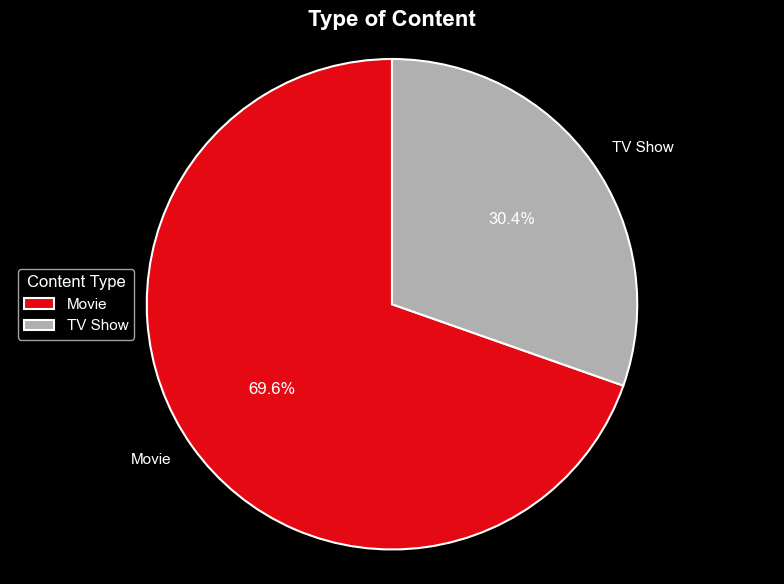

In [80]:
import matplotlib.pyplot as plt

plt.style.use('dark_background') 
plt.figure(figsize=(8, 6))
plt.title('Type of Content', fontsize=16, fontweight='bold')
netflix_palette = ["#E50914", "#B0B0B0", "#9E9E9E", "#666666"]

plt.pie(
    type_of_content.values, 
    labels=type_of_content.index,
    autopct='%1.1f%%', 
    colors=netflix_palette[:len(type_of_content)],
    startangle=90,   
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5} 
)
plt.legend(
    type_of_content.index, 
    title="Content Type", 
    loc="center left",       
    bbox_to_anchor=(0, 0.5),   
    shadow=False, 
    frameon=True
)

plt.axis('equal')  
plt.tight_layout() 

# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\type_of_content.png", dpi=300, bbox_inches='tight')

plt.show()


In [50]:
data_copy = data.copy()
data_copy.fillna('', inplace=True)

In [51]:
content_trend = data.groupby(['release_year', 'type']).size().unstack(fill_value=0)

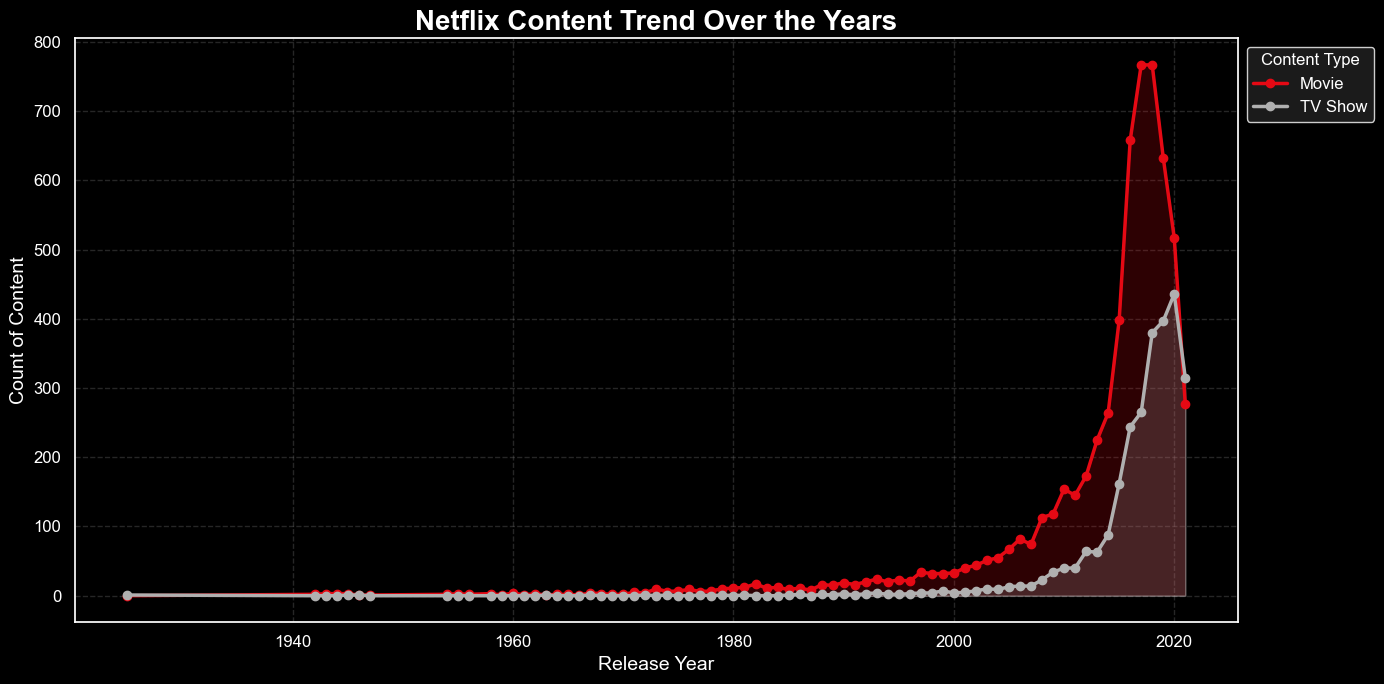

In [81]:
plt.style.use('dark_background') 
netflix_palette = ["#E50914", "#B0B0B0"] 
sns.set_palette(netflix_palette)     
plt.figure(figsize=(14,7))

for col in content_trend.columns:
    plt.plot(content_trend.index, content_trend[col], 
             label=col, linewidth=2.5, marker='o')

    plt.fill_between(content_trend.index, 0, content_trend[col], alpha=0.2)

# Titles and labels
plt.title('Netflix Content Trend Over the Years', fontsize=20, fontweight='bold', color='white')
plt.xlabel('Release Year', fontsize=14, color='white')
plt.ylabel('Count of Content', fontsize=14, color='white')

# Ticks color
plt.xticks( fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.legend(title='Content Type', loc='upper left', bbox_to_anchor=(1,1), frameon=True, facecolor='#222222', edgecolor='white', fontsize=12)

plt.grid(alpha=0.3, color='gray', linestyle='--')

plt.tight_layout()
## plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\Netflix content trend over the years.png",
#             dpi=300, bbox_inches='tight')
plt.show()

In [53]:
content_trend_reset = content_trend.reset_index()
melted = content_trend_reset.melt(
    id_vars='release_year',
    value_vars=['Movie','TV Show'],  
    var_name='Type',
    value_name='Count'
)

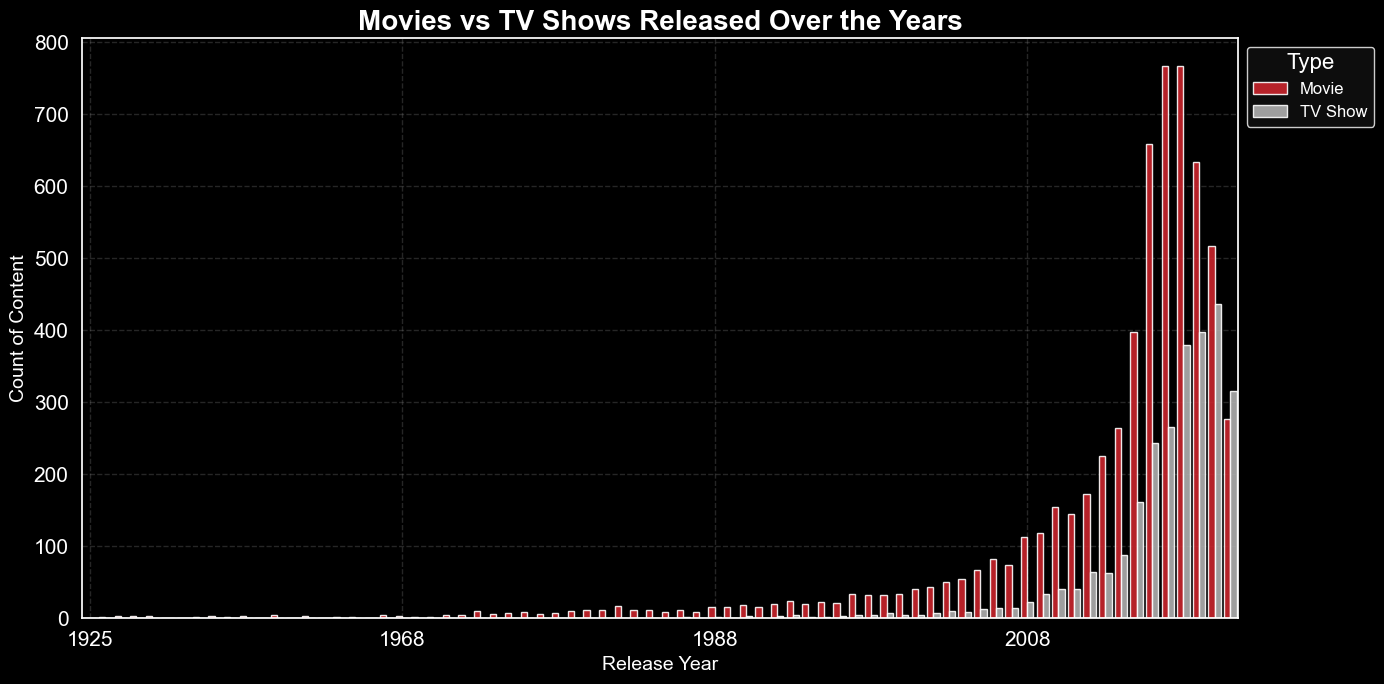

In [82]:
plt.style.use('dark_background')
sns.set_theme(style= None) 
netflix_palette = ["#E50914", "#B0B0B0"] 
sns.set_palette(netflix_palette) 
plt.figure(figsize=(14,7))
melted['release_year'] = melted['release_year'].astype(int)
sns.barplot(
    x='release_year',
    y='Count',
    hue='Type',
    data=melted,
    errorbar=None,
    edgecolor=None,
    alpha=0.9
)

plt.title("Movies vs TV Shows Released Over the Years", fontsize=20, fontweight='bold', color='white')
plt.xlabel("Release Year", fontsize=14, color='white')
plt.ylabel("Count of Content", fontsize=14, color='white')

plt.gca().xaxis.set_major_locator(MultipleLocator(20)) 
plt.xticks( fontsize=15, color='white')

plt.yticks(fontsize=15, color='white')

plt.legend(
    title="Type",
    fontsize=12,
    title_fontsize=16,
    loc='upper left',
    bbox_to_anchor=(1,1),
    frameon=True,
    facecolor='#111111',
    edgecolor='white',
    labelcolor='white'
)

plt.grid(alpha=0.3, color='gray', linestyle='--')
plt.tight_layout()
# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\Movies vs TV Shows Released Over the Years.png",
            # dpi=300, bbox_inches='tight')
plt.show()

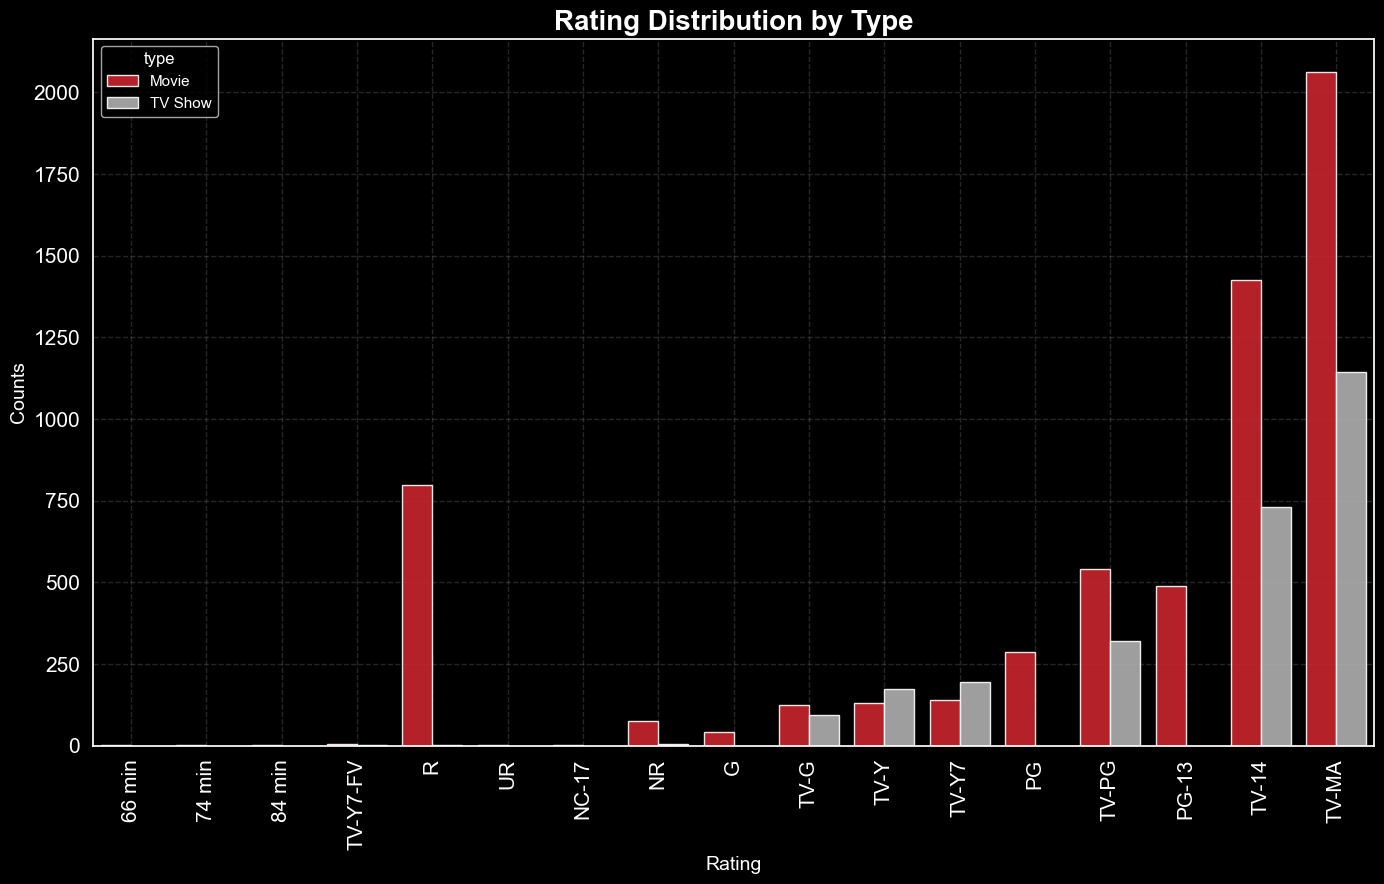

In [83]:
rating_type = data.groupby(['type', 'rating']).size().reset_index(name='Counts')
rating_type = rating_type.sort_values(by='Counts', ascending=True)
plt.figure(figsize=(14, 9))
sns.barplot(
    x="rating",
    y="Counts",
    hue="type",          # <-- this will separate Movies and TV Shows
    data=rating_type,
    edgecolor=None,
    alpha=0.9
)
plt.title("Rating Distribution by Type", fontsize=20, fontweight='bold', color='white')
plt.xlabel("Rating", fontsize=14, color='white')
plt.ylabel("Counts", fontsize=14, color='white')

plt.xticks(rotation=90, fontsize=15, color='white')
plt.yticks(fontsize=15, color='white')

plt.grid(alpha=0.3, color='gray', linestyle='--')
plt.tight_layout()
# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\Rating Distribution by Type.png",
#             dpi=300, bbox_inches='tight')
plt.show()

In [56]:
data['date_added'] = data['date_added'].str.strip() 
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce') 
data = data.dropna(subset=['date_added'])
data['month'] = data['date_added'].dt.month_name()
monthly_counts = data['month'].value_counts()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = monthly_counts.reindex(month_order)
monthly_counts = monthly_counts.reset_index()
monthly_counts.columns = ['Month', 'Counts']

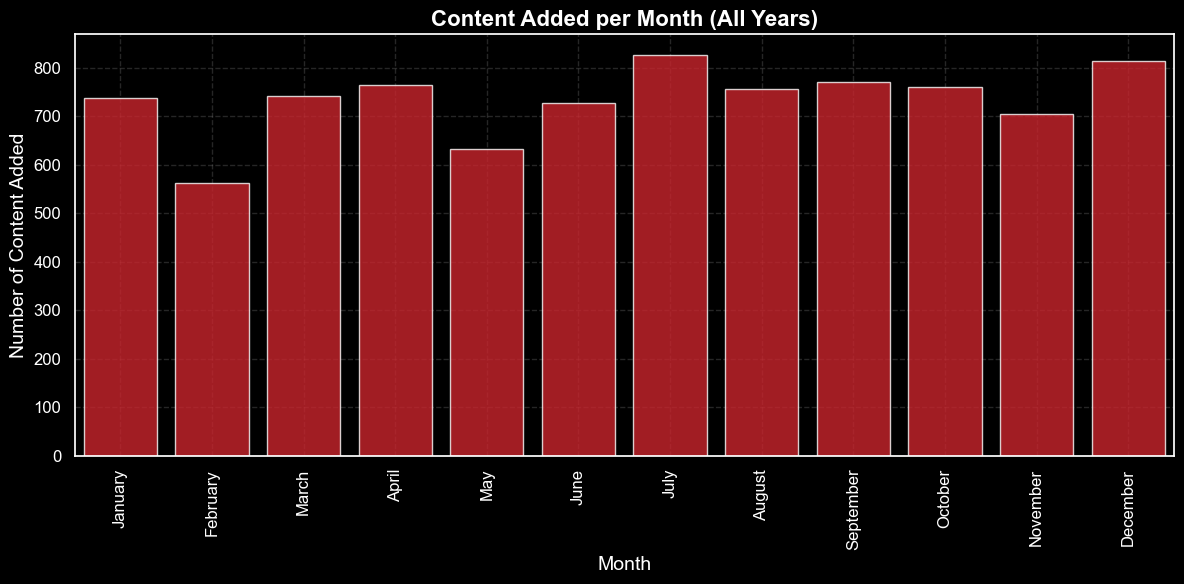

In [84]:
plt.figure(figsize=(12,6))
sns.barplot(
    x='Month',
    y='Counts',
    data=monthly_counts,
    alpha=0.8
)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Content Added', fontsize=14)
plt.title('Content Added per Month (All Years)', fontsize=16, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--', color='gray')
plt.tight_layout()
# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\Content added per month(all years).png",
#             dpi=300, bbox_inches='tight')
plt.show()


In [90]:
country=data['country'].str.split(',').explode().str.strip()
country = country[~country.str.contains('unknown', case=False, na=False)]
country = country.dropna()
all_country = country.value_counts().head(30)
country_df = all_country.reset_index()
country_df.columns = ['Country', 'Count']
country_df = country_df.sort_values(by='Count', ascending=True)

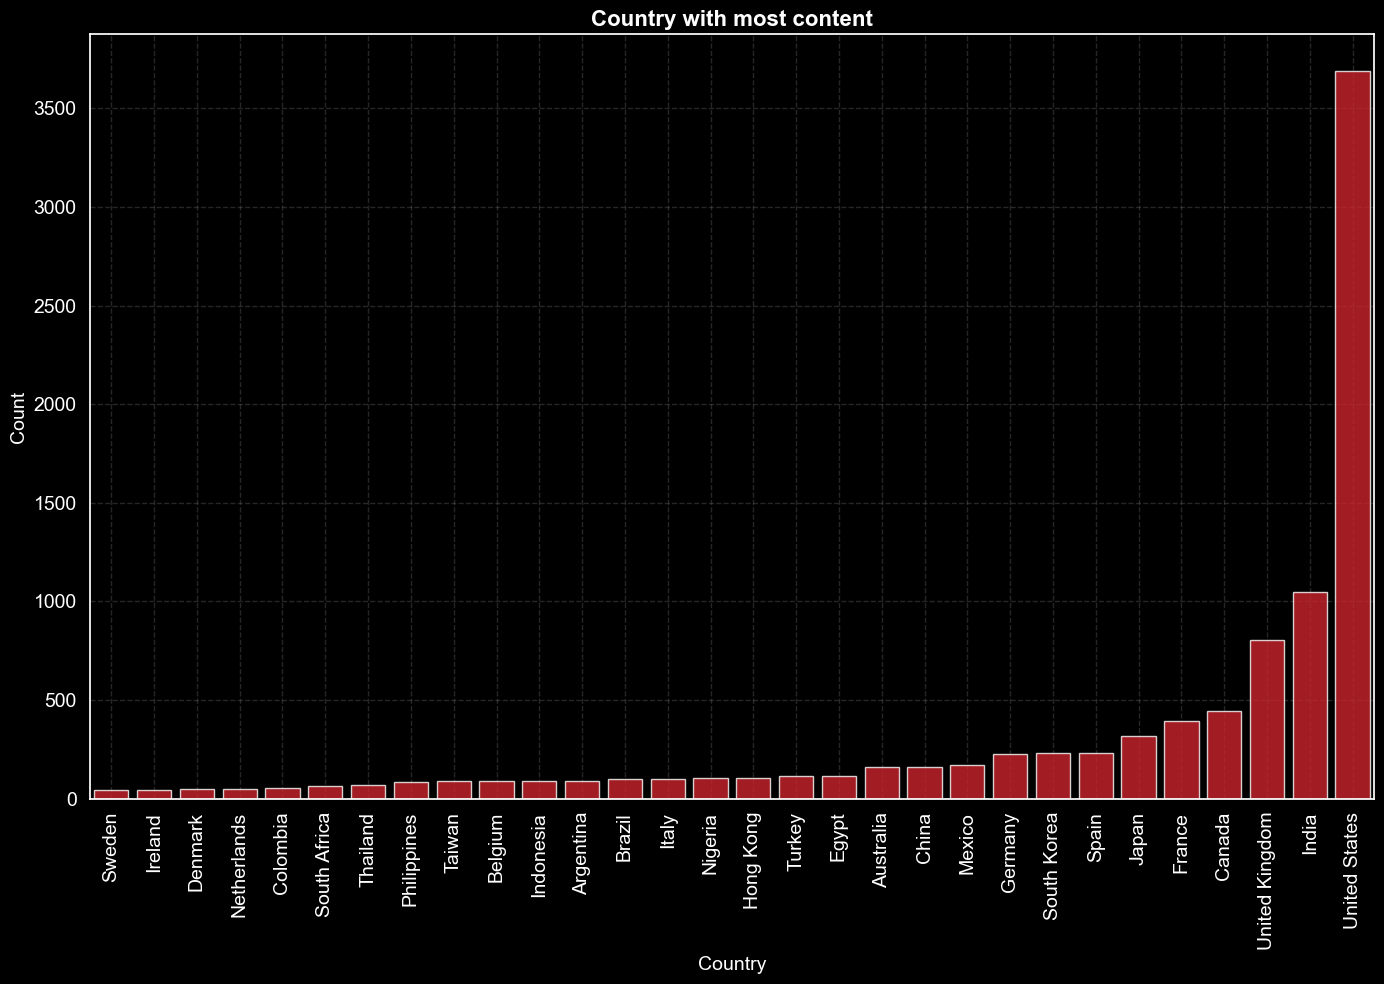

In [92]:
plt.figure(figsize=(14,10))
sns.barplot(
    x = 'Country',
    y = 'Count',
    data = country_df.head(30),
    alpha = 0.8
    )
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Country',fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title("Country with most content",fontsize=16, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--', color='gray')
plt.tight_layout()
# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\country with most content.png",
#             dpi=300, bbox_inches='tight')
plt.show()


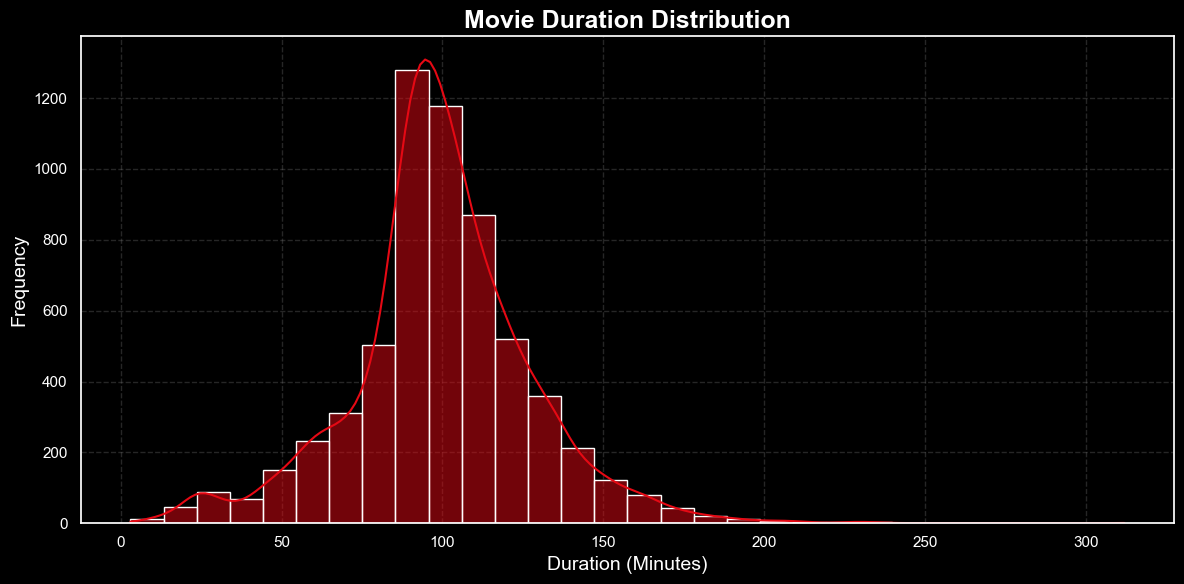

In [93]:
movies = data[data['type'] == 'Movie'].copy()
movies['duration'] = movies['duration'].astype(str)
movies['duration'] = movies['duration'].str.extract('(\d+)').astype(float)


plt.figure(figsize=(12,6))
sns.histplot(movies['duration'], bins=30, kde=True, color='#E50914')
plt.title("Movie Duration Distribution", fontsize=18, fontweight='bold', color='white')
plt.xlabel("Duration (Minutes)", fontsize=14, color='white')
plt.ylabel("Frequency", fontsize=14, color='white')
plt.grid(alpha=0.3, color='gray', linestyle='--')
plt.tight_layout()
# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\Movie duration distribution.png",
#             dpi=300, bbox_inches='tight')
plt.show()

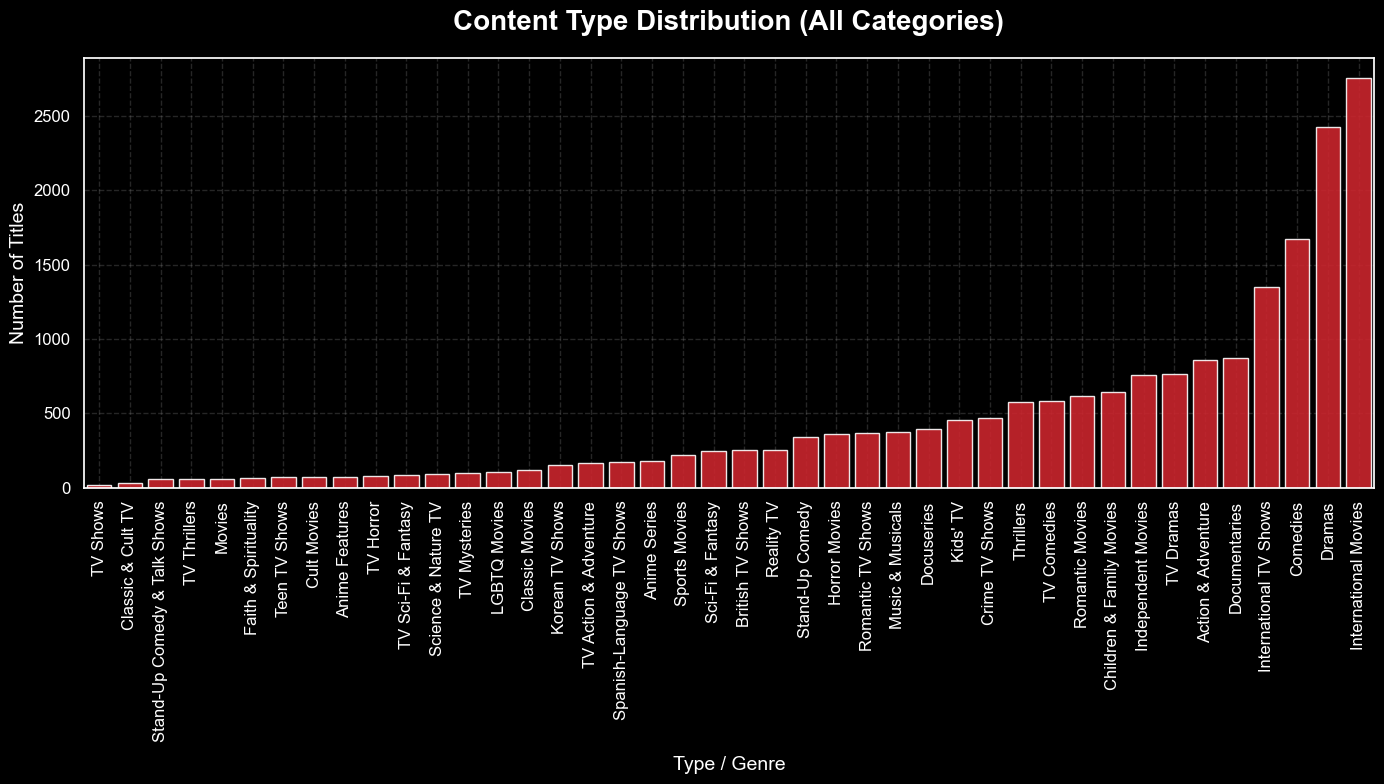

In [94]:
Type = data['listed_in'].str.split(',').explode().str.strip()

total_type = Type.value_counts().reset_index()
total_type.columns = ['Type', 'Count']
total_type = total_type.sort_values(by='Count', ascending=True)

plt.style.use('dark_background')
plt.figure(figsize=(14, 8))

sns.barplot(
    x='Type',
    y='Count',
    data=total_type,
    color='#E50914',
    alpha=0.9
)

plt.title("Content Type Distribution (All Categories)", fontsize=20, fontweight='bold', color='white', pad=20)
plt.xlabel("Type / Genre", fontsize=14, color='white', labelpad=10)
plt.ylabel("Number of Titles", fontsize=14, color='white')

plt.xticks(rotation=90, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.grid(alpha=0.3, color='gray', linestyle='--')
plt.tight_layout()
# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\Content Type Distribution (All Categories).png",
#             dpi=300, bbox_inches='tight')
plt.show()


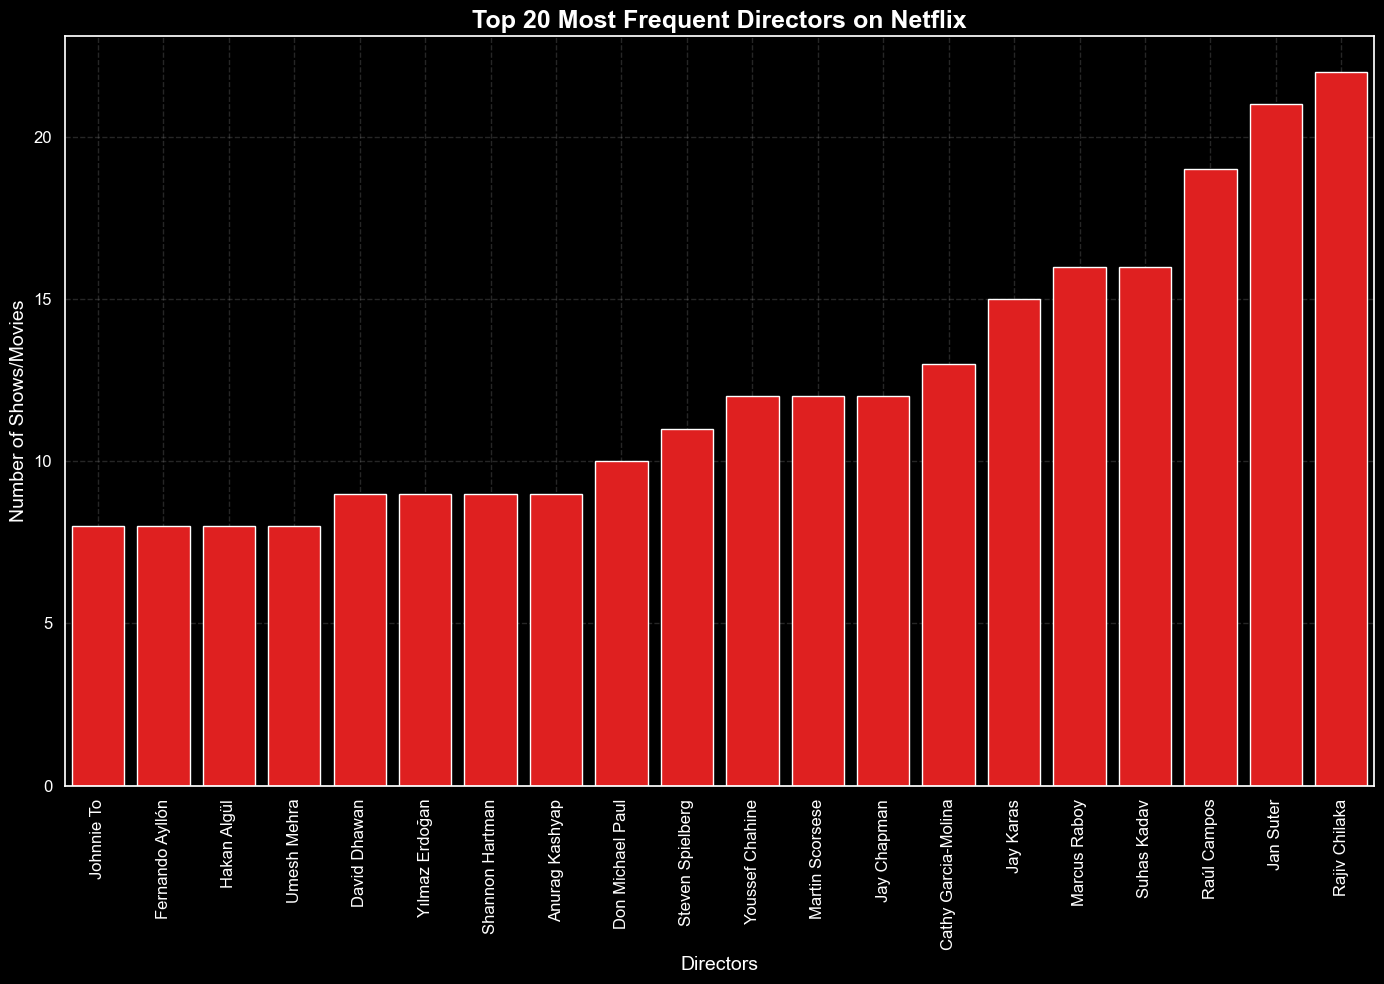

In [ ]:
plt.style.use('dark_background')
netflix_red = '#E50914'


directors = (
    data.loc[data['director'].notna() & (data['director'] != 'Unknown'), 'director']
    .str.split(',')
    .explode()
    .str.strip()
)

director_counts = directors.value_counts().head(20)
director_counts = director_counts.sort_values(ascending=True)

# Plot
plt.figure(figsize=(14, 10))
sns.barplot(x=director_counts.index, y=director_counts.values, color='red')


plt.title("Content Type Distribution (All Categories)", fontsize=18, color='white', fontweight='bold')
plt.xlabel("Directors", fontsize=14, color='white')
plt.ylabel("Number of Shows/Movies", fontsize=14, color='white')
plt.xticks(rotation=90, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(alpha=0.3, linestyle='--', color='gray')

plt.tight_layout()
# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\Top 20 Most Frequent Directors on Netflix.png",
#             dpi=300, bbox_inches='tight')
plt.show()


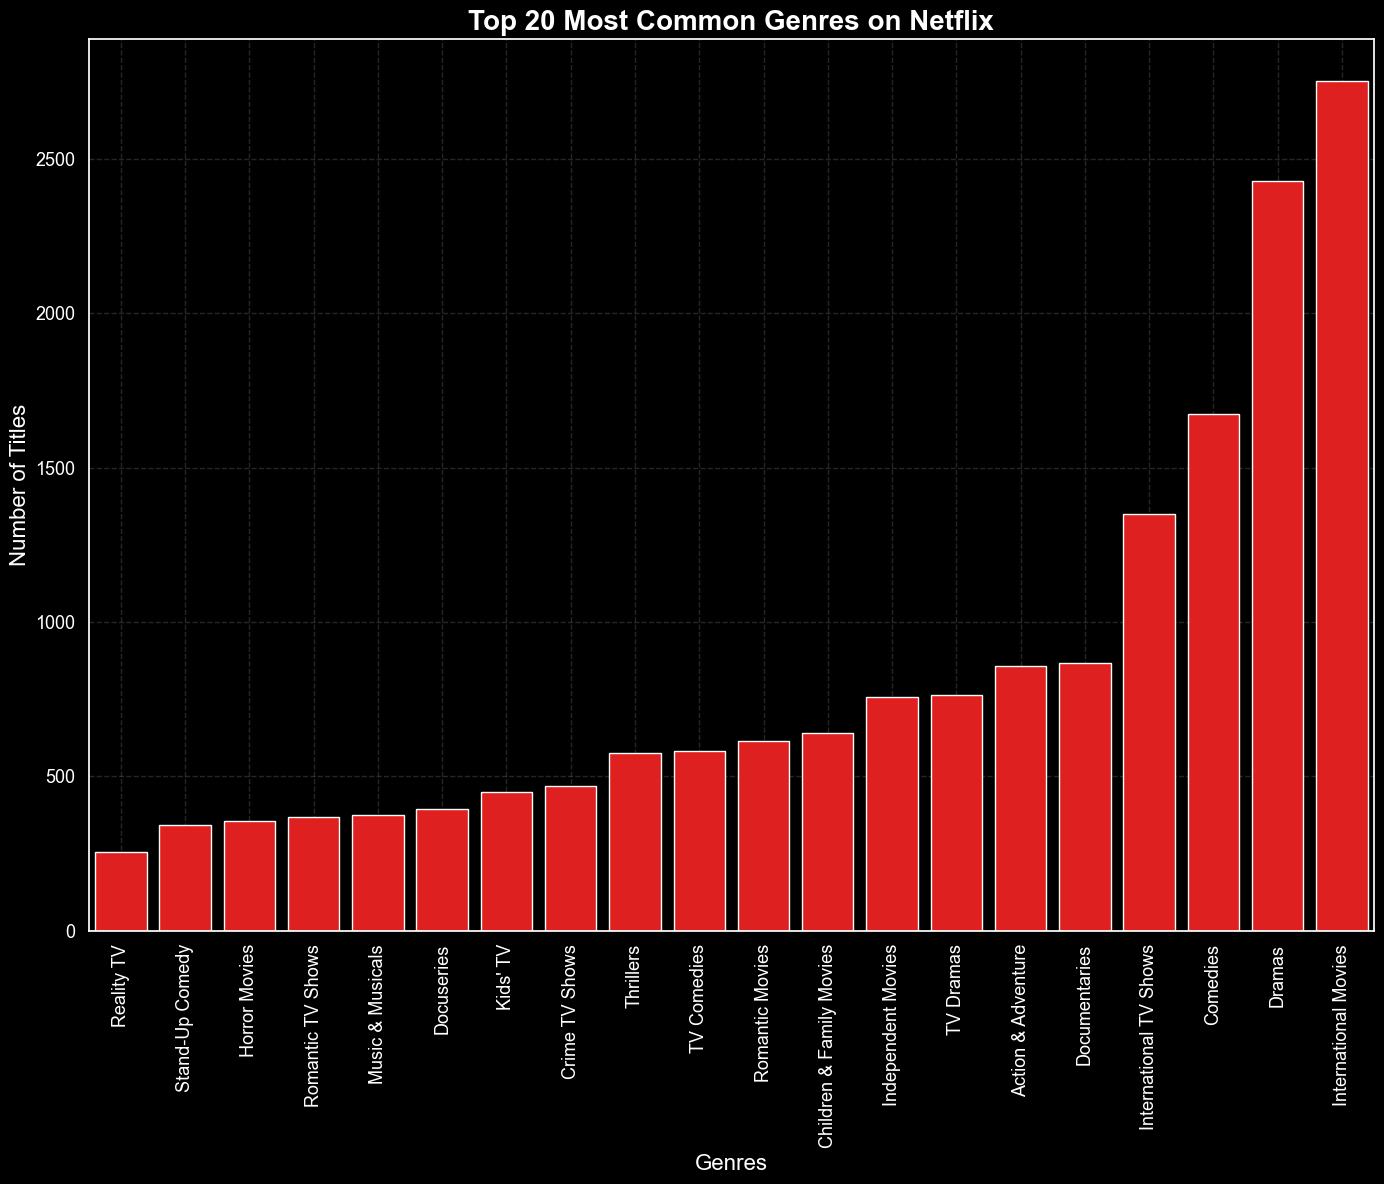

In [98]:
genres = data['listed_in'].dropna().str.split(',').explode().str.strip()
genre_counts = genres.value_counts().head(20).sort_values(ascending=True)

plt.figure(figsize=(14, 12)) 
sns.barplot(x=genre_counts.index, y=genre_counts.values, color='red') 

plt.title("Top 20 Most Common Genres on Netflix", fontsize=20, color='white', fontweight='bold')
plt.xlabel("Genres", fontsize=16, color='white')
plt.ylabel("Number of Titles", fontsize=16, color='white')
plt.xticks(rotation=90, fontsize=13, color='white')
plt.yticks(fontsize=13, color='white')
plt.grid(alpha=0.3, linestyle='--', color='gray')

plt.tight_layout()
# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\Top 20 Most Common Genres on Netflix.png",
#             dpi=300, bbox_inches='tight')
plt.show()

In [64]:
genre_trend = data.dropna(subset=['listed_in', 'release_year'])
genre_trend = genre_trend.assign(
    genre=genre_trend['listed_in'].str.split(',')
).explode('genre')
genre_trend['genre'] = genre_trend['genre'].str.strip()


top5_genres = genre_trend['genre'].value_counts().head(5).index
genre_trend = genre_trend[genre_trend['genre'].isin(top5_genres)]


trend_data = genre_trend.groupby(['release_year', 'genre']).size().reset_index(name='Count')


trend_data = trend_data[trend_data['release_year'] >= 2010]


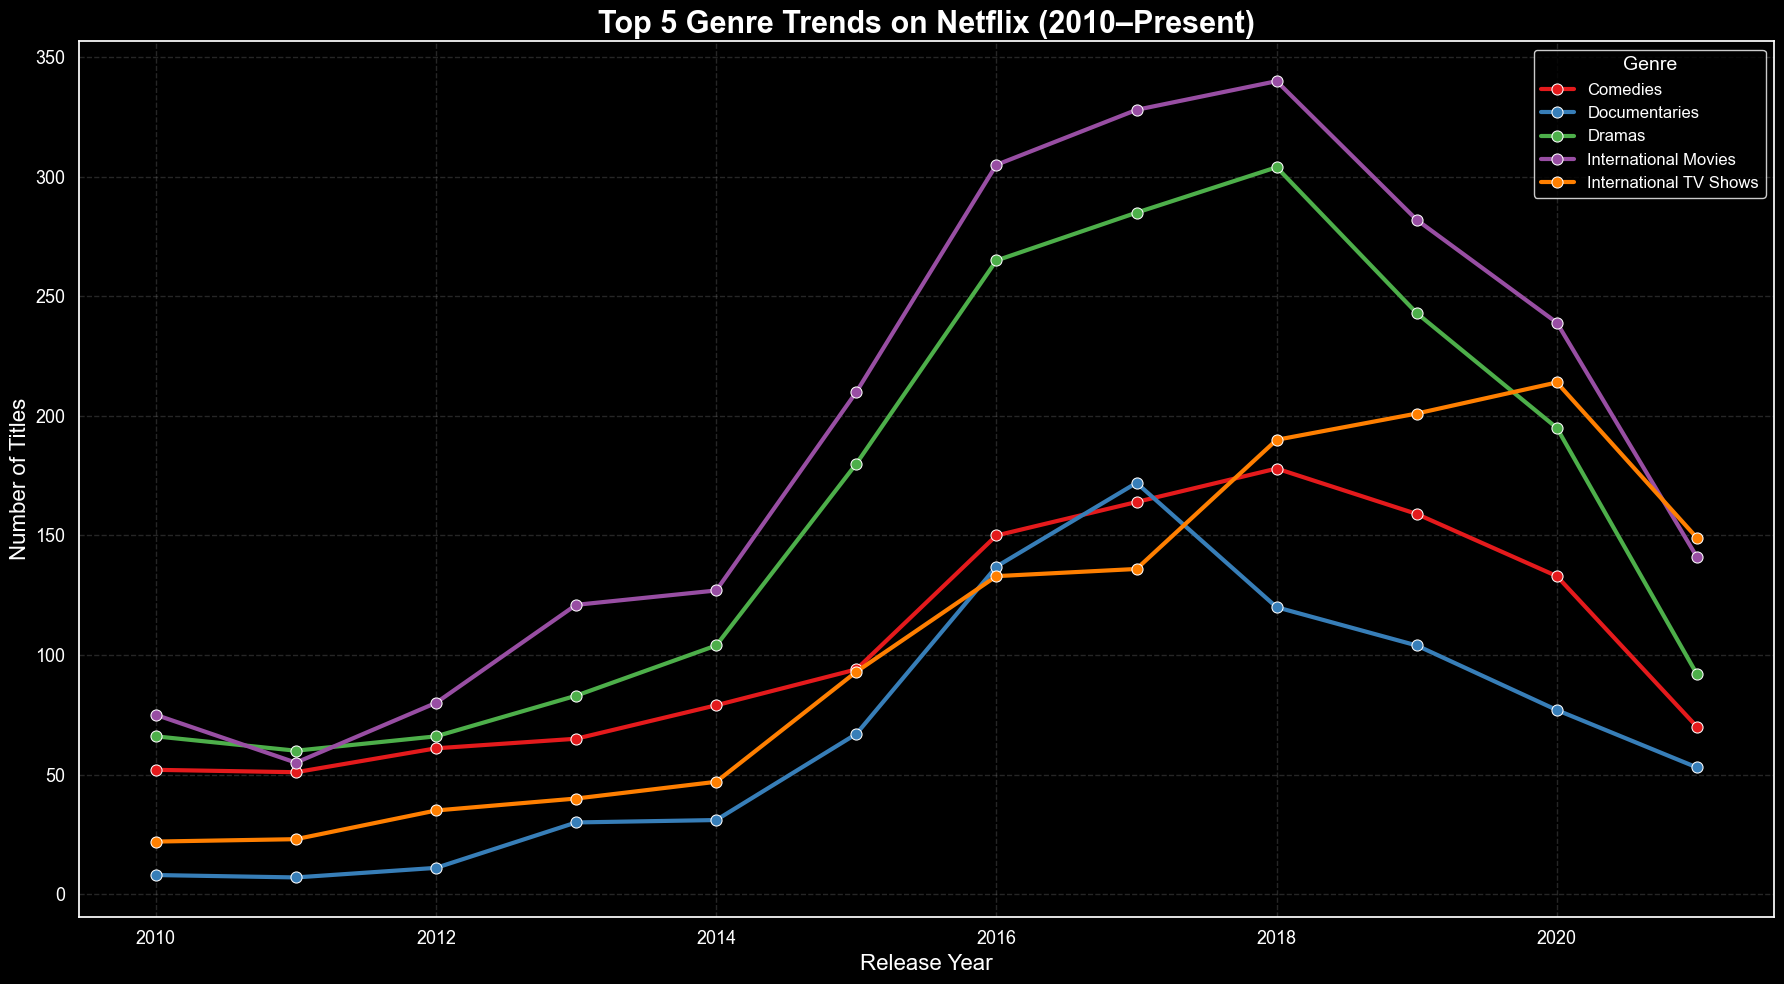

In [99]:
plt.style.use('dark_background') 

plt.figure(figsize=(18, 10))
sns.lineplot(
    data=trend_data,
    x='release_year',
    y='Count',
    hue='genre',
    linewidth=3,
    marker='o',
    markersize=8,
    palette='Set1' 
)


plt.title("Top 5 Genre Trends on Netflix (2010–Present)", fontsize=22, fontweight='bold', color='white')
plt.xlabel("Release Year", fontsize=16, color='white')
plt.ylabel("Number of Titles", fontsize=16, color='white')


plt.xticks(fontsize=13, color='white')
plt.yticks(fontsize=13, color='white')

plt.legend(title='Genre', title_fontsize=14, fontsize=12, labelcolor='white', facecolor='black', edgecolor='white')


plt.grid(alpha=0.3, linestyle='--', color='gray')

plt.tight_layout()
# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\Top 5 Genre Trends on Netflix (2010–Present).png",
#             dpi=300, bbox_inches='tight')
plt.show()


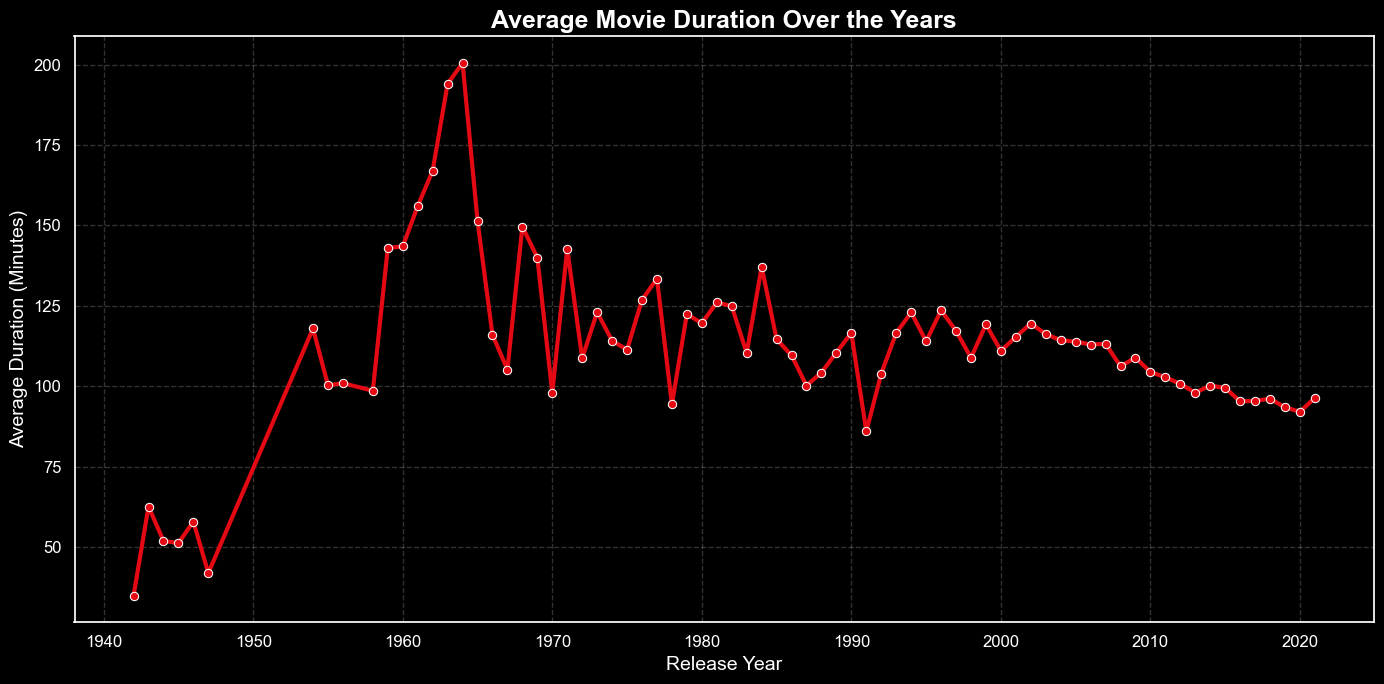

In [ ]:
# Netflix red
netflix_red = "#E50914"

plt.figure(figsize=(14,7))
avg_duration = movies.groupby('release_year')['duration'].mean().reset_index()
# Line plot
sns.lineplot(
    data=avg_duration,
    x='release_year',
    y='duration',
    color=netflix_red,
    linewidth=3,
    marker='o',
    markersize=6
)

# Titles & labels
plt.title("Average Movie Duration Over the Years", fontsize=18, fontweight='bold', color='white')
plt.xlabel("Release Year", fontsize=14, color='white')
plt.ylabel("Average Duration (Minutes)", fontsize=14, color='white')

# Ticks
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.grid(alpha=0.2, linestyle='--', color='white')  

plt.tight_layout()
# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\Average movie duration over the years.png",
#                 dpi=300, bbox_inches='tight')
plt.show()


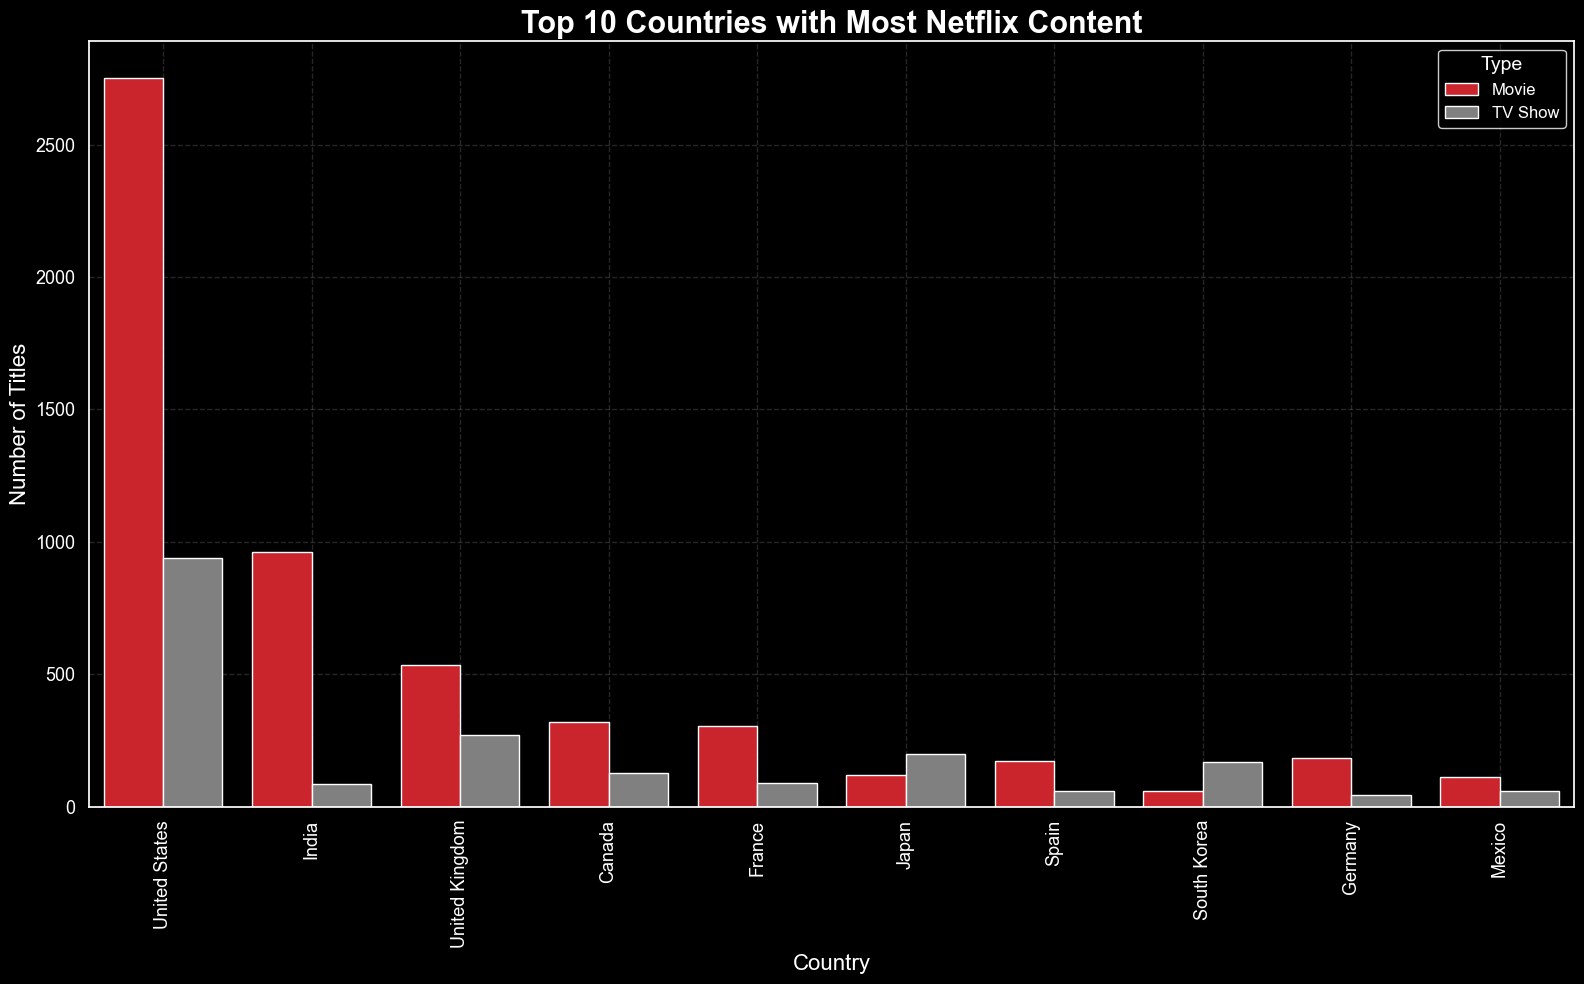

In [102]:
country_df = data.dropna(subset=['country'])
country_df = country_df.assign(
    country=country_df['country'].str.split(',')
).explode('country')
country_df['country'] = country_df['country'].str.strip()

top10_countries = country_df['country'].value_counts().head(10).index
country_df = country_df[country_df['country'].isin(top10_countries)]

plt.style.use('dark_background')

plt.figure(figsize=(16, 10))  
sns.countplot(
    data=country_df,
    x='country', 
    hue='type',
    order=country_df['country'].value_counts().head(10).index,
    palette={
        'Movie': '#E50914',   
        'TV Show': '#808080'  
    }
)

plt.title("Top 10 Countries with Most Netflix Content", fontsize=22, color='white', fontweight='bold')
plt.xlabel("Country", fontsize=16, color='white')
plt.ylabel("Number of Titles", fontsize=16, color='white')

plt.xticks(rotation=90, fontsize=13, color='white')
plt.yticks(fontsize=13, color='white')

plt.legend(title="Type", title_fontsize=14, fontsize=12, labelcolor='white', facecolor='black', edgecolor='white')

plt.grid(alpha=0.3, linestyle='--', color='gray')

plt.tight_layout()
# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\Top 10 Countries with most contents.png",
#                 dpi=300, bbox_inches='tight')
plt.show()


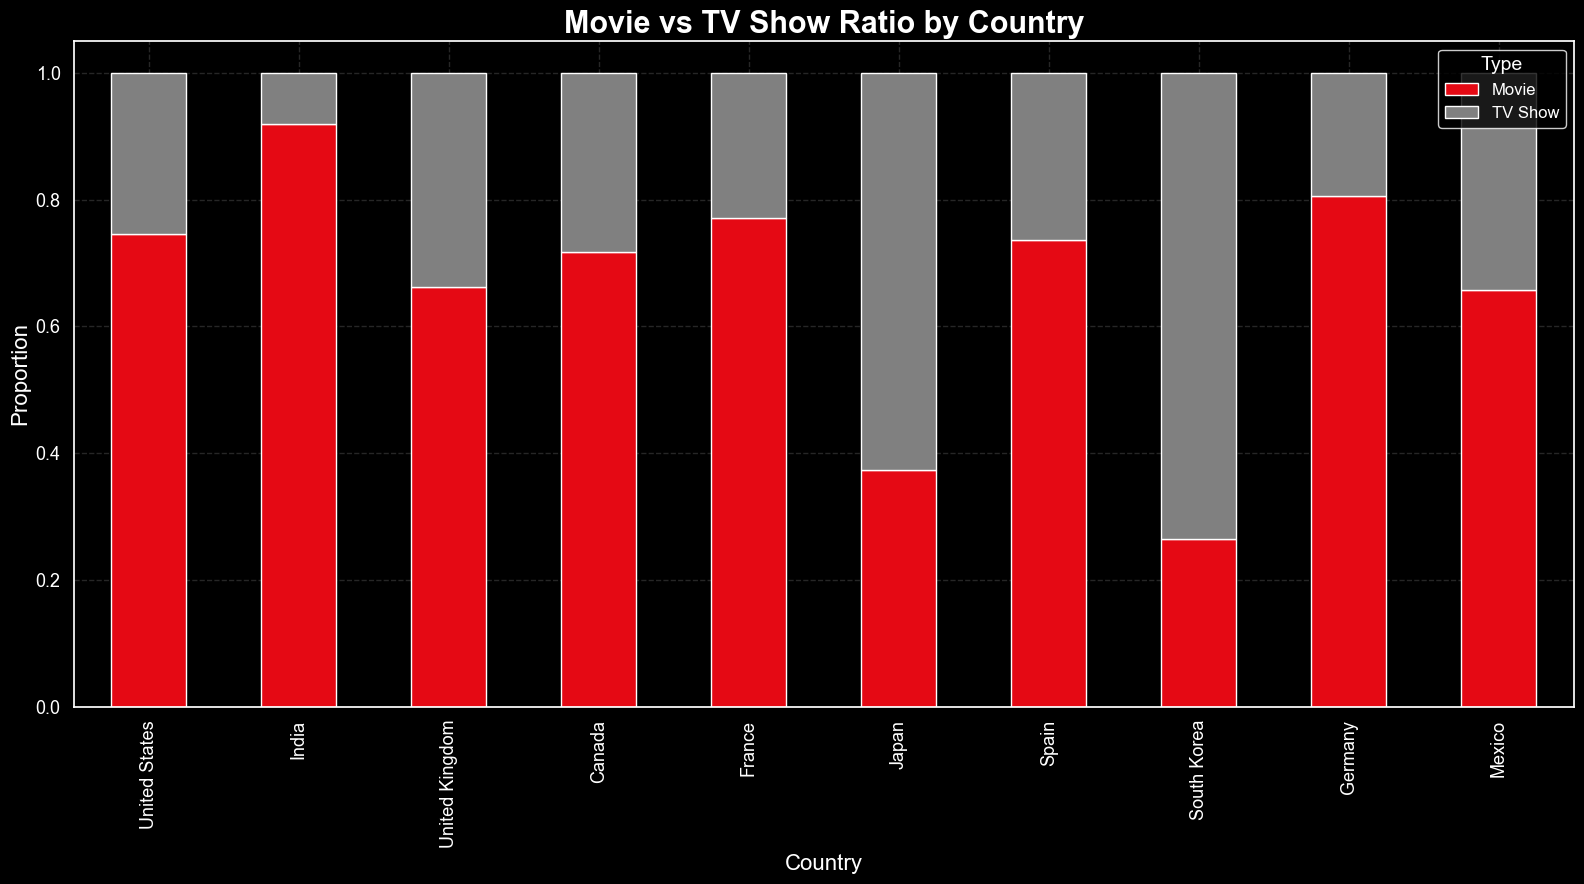

In [103]:
ratio_df = country_df.groupby(['country','type']).size().unstack(fill_value=0)
ratio_df['Total'] = ratio_df.sum(axis=1)
ratio_df = ratio_df.sort_values('Total', ascending=False).head(10)
ratio_df[['Movie', 'TV Show']] = ratio_df[['Movie', 'TV Show']].div(ratio_df['Total'], axis=0)

plt.style.use('dark_background')

ratio_df[['Movie', 'TV Show']].plot(
    kind='bar',
    stacked=True,
    figsize=(16, 9), 
    color=['#E50914', '#808080'],
    edgecolor='white'
)


plt.title("Movie vs TV Show Ratio by Country", fontsize=22, color='white', fontweight='bold')
plt.xlabel("Country", fontsize=16, color='white')
plt.ylabel("Proportion", fontsize=16, color='white')
plt.xticks(fontsize=13, color='white')
plt.yticks(fontsize=13, color='white')


plt.legend(title="Type", title_fontsize=14, fontsize=12, labelcolor='white', facecolor='black', edgecolor='white')


plt.grid(alpha=0.3, linestyle='--', color='gray')

plt.tight_layout()
# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\Movie vs Tv shows ratio by country.png",
#                 dpi=300, bbox_inches='tight')
plt.show()


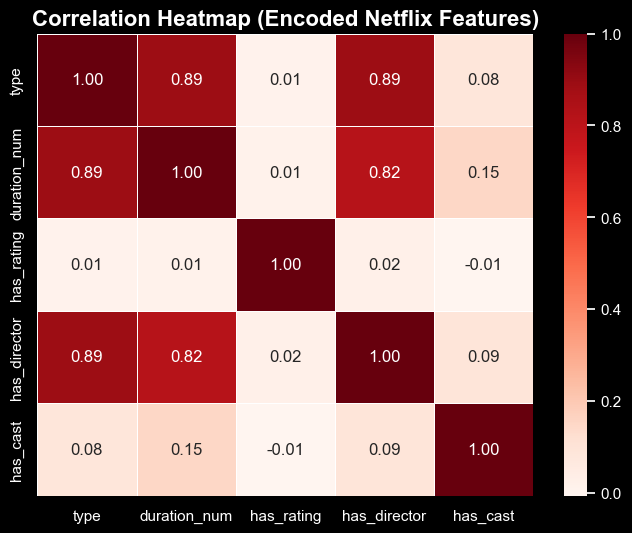

In [104]:
encoded = data.copy()

encoded['type'] = encoded['type'].map({'Movie': 1, 'TV Show': 0})
encoded['has_rating'] = encoded['rating'].notna().astype(int)
encoded['has_director'] = encoded['director'].notna().astype(int)
encoded['has_cast'] = encoded['cast'].notna().astype(int)

encoded['duration_num'] = encoded['duration'].str.extract('(\d+)').astype(float)
encoded.loc[encoded['type'] == 0, 'duration_num'] = 0  

corr_data = encoded[['type', 'duration_num', 'has_rating', 'has_director', 'has_cast']]
corr_matrix = corr_data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix, annot=True, cmap='Reds', fmt='.2f',
    linewidths=0.5, cbar=True
)
plt.title("Correlation Heatmap (Encoded Netflix Features)", fontsize=16, color='white', fontweight='bold')
# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\Correlation Heatmap.png",
#                 dpi=300, bbox_inches='tight')
plt.show()


In [70]:
filtered_data = data[(data['country'].notna()) & (data['country'] != 'Unknown')].copy()

filtered_data['genre_split'] = filtered_data['listed_in'].str.split(',')
exploded_data = filtered_data.explode('genre_split')
exploded_data['genre_split'] = exploded_data['genre_split'].str.strip()

top_countries = exploded_data['country'].value_counts().head(10).index
exploded_top = exploded_data[exploded_data['country'].isin(top_countries)]

def top_genres_per_country(df, top_n=5):
    result = pd.DataFrame()
    for country in df['country'].unique():
        temp = df[df['country'] == country].copy()
        top_genres = temp['genre_split'].value_counts().head(top_n).index
        temp['genre_split'] = temp['genre_split'].apply(lambda x: x if x in top_genres else 'Others')
        result = pd.concat([result, temp])
    return result

exploded_top = top_genres_per_country(exploded_top, top_n=5)

genre_ratio = exploded_top.groupby(['genre_split', 'country']).size().unstack(fill_value=0)
genre_ratio = genre_ratio.div(genre_ratio.sum(axis=0), axis=1)

unique_genres = genre_ratio.index.tolist()
palette = sns.color_palette("Set2", n_colors=len(unique_genres)-1) + [(0.5, 0.5, 0.5)]


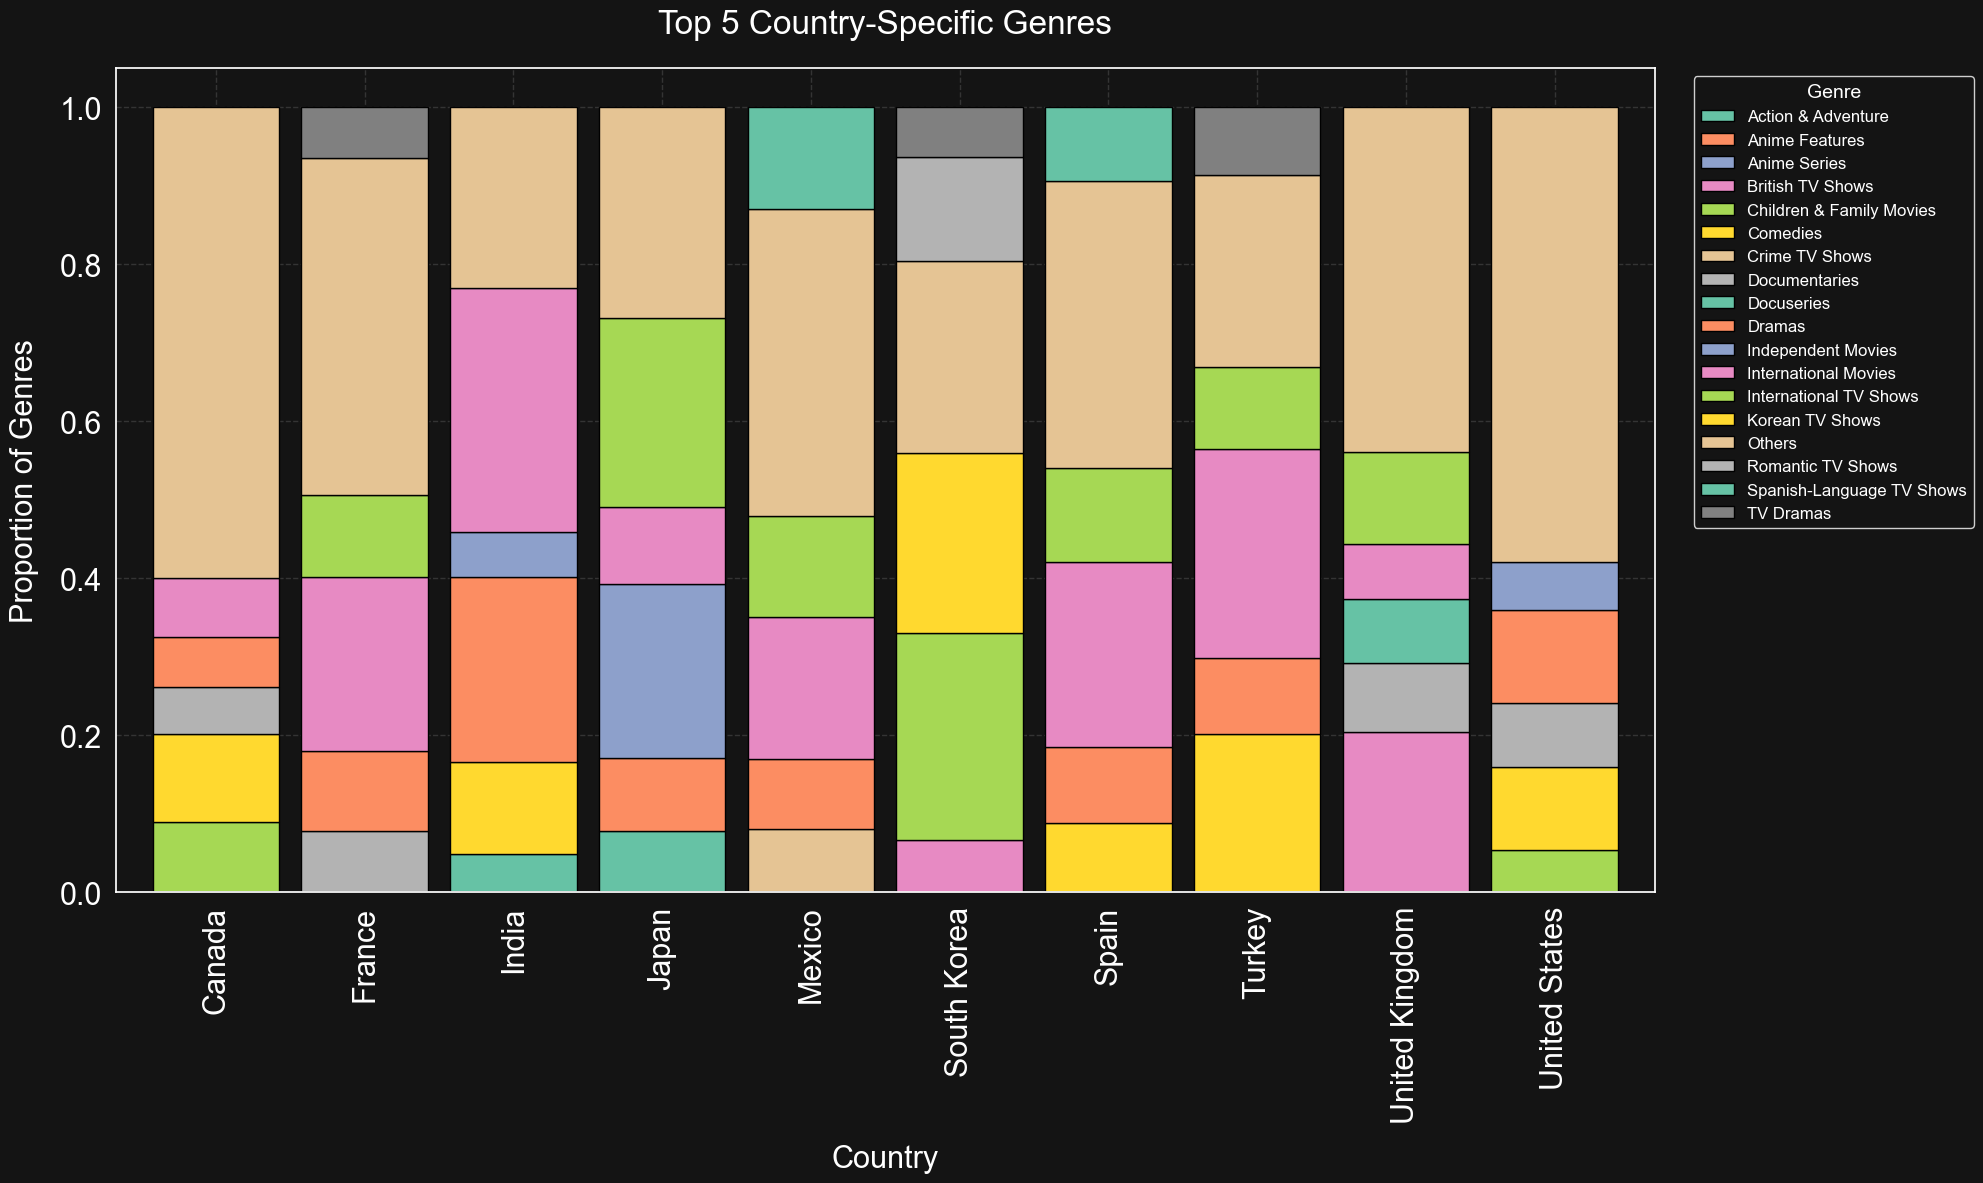

In [113]:
fig, ax = plt.subplots(figsize=(20,12)) 
genre_ratio.T.plot(kind='bar', stacked=True, color=palette, edgecolor='black', width=0.85, ax=ax)

ax.set_title('Top 5 Country-Specific Genres', fontsize=24, color='white', pad=25)
ax.set_xlabel('Country', fontsize=22, color='white', labelpad=15)
ax.set_ylabel('Proportion of Genres', fontsize=22, color='white', labelpad=15)
ax.tick_params(axis='x', labelsize=22, colors='white')
ax.tick_params(axis='y', labelsize=22, colors='white')

ax.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left', facecolor='#141414', edgecolor='white', labelcolor='white', fontsize=12, title_fontsize=14, frameon=True)

ax.set_facecolor('#141414')
fig.patch.set_facecolor('#141414')

plt.tight_layout()
plt.grid(alpha=0.3, linestyle='--', color='gray')
# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\Top % country specific genres.png",
#                 dpi=300, bbox_inches='tight')
plt.show()

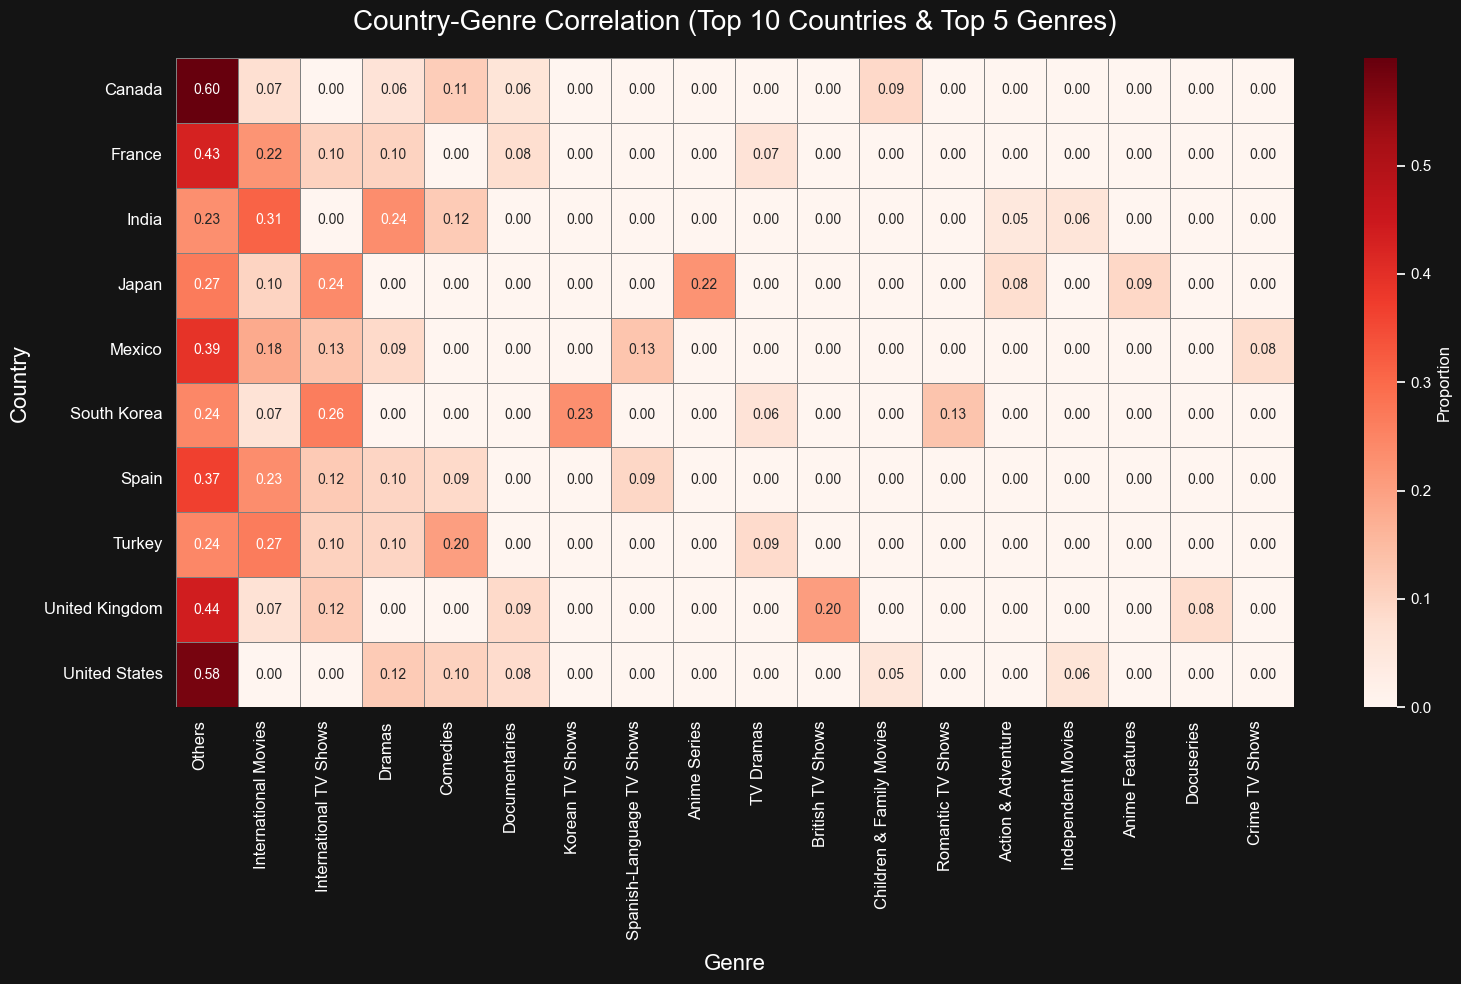

In [106]:
data_clean = data[data['country'].notna() & (data['country'] != 'Unknown')].copy()

data_clean['genre_split'] = data_clean['listed_in'].str.split(',')
exploded_data = data_clean.explode('genre_split')
exploded_data['genre_split'] = exploded_data['genre_split'].str.strip()

top_countries = exploded_data['country'].value_counts().head(10).index
exploded_top = exploded_data[exploded_data['country'].isin(top_countries)]

def top_genres_per_country(df, top_n=5):
    result = pd.DataFrame()
    for country in df['country'].unique():
        temp = df[df['country'] == country].copy()
        top_genres = temp['genre_split'].value_counts().head(top_n).index
        temp['genre_split'] = temp['genre_split'].apply(lambda x: x if x in top_genres else 'Others')
        result = pd.concat([result, temp])
    return result

exploded_top = top_genres_per_country(exploded_top, top_n=5)

country_genre = exploded_top.groupby(['country','genre_split']).size().unstack(fill_value=0)
country_genre_ratio = country_genre.div(country_genre.sum(axis=1), axis=0)

country_genre_ratio = country_genre_ratio[country_genre_ratio.sum().sort_values(ascending=False).index]

plt.figure(figsize=(16,10))
sns.heatmap(
    country_genre_ratio, 
    annot=True, 
    fmt=".2f", 
    cmap="Reds", 
    linewidths=0.5, 
    linecolor='gray', 
    cbar_kws={'label': 'Proportion'},
    annot_kws={'fontsize':10},
    square=False
)

plt.title('Country-Genre Correlation (Top 10 Countries & Top 5 Genres)', fontsize=20, color='white', pad=20)
plt.xlabel('Genre', fontsize=16, color='white', labelpad=10)
plt.ylabel('Country', fontsize=16, color='white', labelpad=10)

plt.xticks(ha='right', fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.gca().set_facecolor('#141414')
plt.gcf().patch.set_facecolor('#141414')
sns.set_style("darkgrid")

plt.tight_layout()
# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\Country-Genre Correlation.png",
#                 dpi=300, bbox_inches='tight')
plt.show()


In [73]:
df = data.copy()

df['has_rating'] = df['rating'].notna().astype(int)
def duration_bin(duration_str):
    try:
        mins = int(duration_str.split(' ')[0])
        if mins < 60:
            return 'Short'
        elif 60 <= mins <= 120:
            return 'Medium'
        else:
            return 'Long'
    except:
        return 'Unknown'

df['duration_bin'] = df['duration'].fillna('0 min').apply(duration_bin)
df_filtered = df[df['duration_bin'] != 'Unknown']


C:\Users\pande\AppData\Local\Temp\ipykernel_9020\3984233107.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='duration_bin', data=df_filtered, palette='Reds_r', order=['Short', 'Medium', 'Long', 'Unknown'])


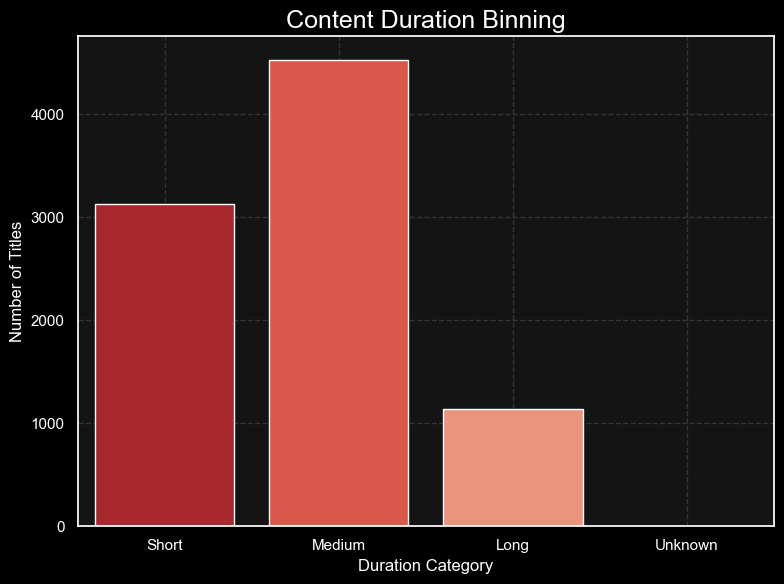

In [107]:
plt.style.use('dark_background')

plt.figure(figsize=(8, 6))
sns.countplot(x='duration_bin', data=df_filtered, palette='Reds_r', order=['Short', 'Medium', 'Long', 'Unknown'])

plt.title('Content Duration Binning', fontsize=18, color='white')
plt.xlabel('Duration Category', color='white')
plt.ylabel('Number of Titles', color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.gca().set_facecolor('#141414')

plt.tight_layout()
plt.grid(alpha=0.3, linestyle='--', color='gray')
# plt.savefig(r"C:\Users\pande\Scikit-Learn\netflix_data_analyze\MovieRecommender\EDA outputs\Content duration binning.png",
#                 dpi=300, bbox_inches='tight')
plt.show()
